# EDA-Schema Dataset Analysis

This analysis is based on EDA-Schema open dataset available here. The following are details in the dataset

- Physical Design Toolset: OpenROAD
- Design PDK: skywater 130 hd
- Parameter setup/Constraints
    - clock latency: 0.01 ns
    - clock input delay: 0.01
    - clock output delay: 0.01
    - utilization: 30%
    - aspect ratio: 1.0
    - clock uncertainty (setup/hold): 0.2ns


Following circuits are used under target clock to meet/barely miss timing.

|         | Barely Fail (id=000001) | |  Barely Pass (id=000002) | |
|----------------|----------------------------------------------|--------------------------------------------|-----------------------------------------------|---------------------------------------------|
| **Circuit** | **Target Clock Period (ns)** | **Worst Slack (ns)** | **Target Clock Period (ns)** | **Worst Slack (ns)** |
|ac97_ctrl | 3 | -0.1823 | 3.25 | 0.1333|
|aes_core | 3.5 | -0.1999 | 3.75 | 0.0458|
|des3_area | 3.75 | -0.0119 | 4 | 0.1823|
|i2c | 2.25 | -0.1594 | 2.5 | 0.0658|
|mem_ctrl | 5 | -0.0863 | 5.25 | 0.1420|
|pci | 3.75 | -0.1326 | 4 | 0.1548|
|sasc | 1.75 | -0.0992 | 2 | 0.1752|
|simple_spi | 2 | -0.1452 | 2.25 | 0.1232|
|spi | 4.25 | -0.1739 | 4.5 | 0.2488|
|ss_pcm | 1.625 | -0.0144 | 1.75 | 0.1107|
|systemcaes | 4.75 | -0.1644 | 5 | 0.0050|
|systemcdes | 4 | -0.0069 | 4.25 | 0.3052|
|tv80 | 7 | -0.0294 | 7.25 | 0.1227|
|usb_funct | 2.5 | -0.0917 | 2.75 | 0.1018|
|usb_phy | 1.75 | -0.0449 | 2 | 0.1821|
|wb_dma | 3 | -0.0746 | 3.25 | 0.0708|

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

DATASET_DIR = "../dataset/dataset_openroad_sky130hd_iwls05_v1.1_final"
dataset = Dataset(SQLitePickleDB(DATASET_DIR))

## Netlist Analysis

In [56]:
netlist_df = dataset.db.get_table_data("netlists")
df = netlist_df.merge(dataset.db.get_table_data("cell_metrics"), on=["circuit", "netlist_id", "phase"])
df = df.merge(dataset.db.get_table_data("area_metrics"), on=["circuit", "netlist_id", "phase"])
df = df.merge(dataset.db.get_table_data("power_metrics"), on=["circuit", "netlist_id", "phase"])
df = df.merge(dataset.db.get_table_data("critical_path_metrics"), on=["circuit", "netlist_id", "phase"])
df['phase'] = df['phase'].astype(pd.CategoricalDtype(PHASES , ordered=True))

columns = ["circuit", "netlist_id", "no_of_inputs", "no_of_outputs", "no_of_cells", "no_of_nets"]
df[df.phase=="detailed_route"][columns]

,circuit,netlist_id,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets
5,ac97_ctrl,id-000001,84.0,48.0,36961.0,6664.0
11,ac97_ctrl,id-000002,84.0,48.0,37048.0,6660.0
17,aes_core,id-000001,259.0,129.0,63102.0,13751.0
23,aes_core,id-000002,259.0,129.0,63244.0,13529.0
29,des3_area,id-000001,240.0,64.0,14980.0,3889.0
35,des3_area,id-000002,240.0,64.0,14889.0,3884.0
41,i2c,id-000001,19.0,14.0,4572.0,728.0
47,i2c,id-000002,19.0,14.0,2990.0,717.0
53,mem_ctrl,id-000001,115.0,152.0,35988.0,6148.0
59,mem_ctrl,id-000002,115.0,152.0,35985.0,6120.0


---
## Power, Performance, Area Analysis

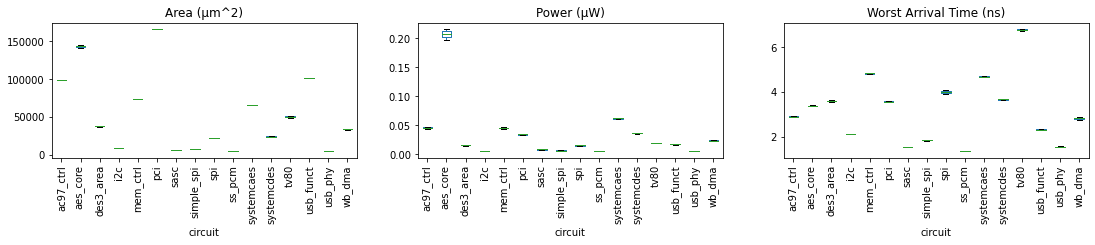

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 2.5))

columns = ["total_area", "total_power", "worst_arrival_time"]
xlabels = ["Area (µm^2)", "Power (µW)", "Worst Arrival Time (ns)"]

for i in range(3):
    df[df.phase=="detailed_route"].boxplot(column=[columns[i]], by='circuit', grid=False, ax=axes[i])
    axes[i].yaxis.get_major_formatter().set_scientific(False)
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

_ = fig.suptitle('')

## Timing Path Analysis

In [43]:
timing_path_df = dataset.db.get_table_data("timing_paths", path_type="max", phase="detailed_route")
def get_min_slack(group):
    return group.loc[group['slack'].idxmin()]

timing_path_summary_df = timing_path_df.groupby(["circuit", "netlist_id"]).apply(get_min_slack)[["slack"]]
timing_path_summary_df["timing_path_count"] = timing_path_df.groupby(["circuit", "netlist_id"]).count().phase
timing_path_summary_df["timing_path_count_cio"] = timing_path_df[timing_path_df.slack<0].groupby(["circuit", "netlist_id"]).count().phase.fillna(0)
timing_path_summary_df["tns"] = timing_path_df[timing_path_df.slack<0].groupby(["circuit", "netlist_id"]).sum().slack
timing_path_summary_df#

slack  timing_path_count  timing_path_count_cio  \
circuit    netlist_id                                                       
ac97_ctrl  id-000001  -0.182309              11507                    4.0   
           id-000002   0.133329              11507                    NaN   
aes_core   id-000001  -0.199885               3455                  105.0   
           id-000002   0.045823               3455                    NaN   
des3_area  id-000001  -0.011935                640                    3.0   
           id-000002   0.182252                640                    NaN   
i2c        id-000001  -0.159418                833                  301.0   
           id-000002   0.065763                833                    NaN   
mem_ctrl   id-000001  -0.086298               6460                   26.0   
           id-000002   0.141991               6460                    NaN   
pci        id-000001  -0.132643              17684                  210.0   
           id-000002   0.154832              17684                    NaN   
sasc       id-000001  -0.099185                662                  174.0   
           id-000002   0.175233                662                    NaN   
simple_spi id-000001  -0.145162                739                   61.0   
           id-000002   0.123199                739                    NaN   
spi        id-000001  -0.173942               1599                 1370.0   
           id-000002   0.248844               1599                    NaN   
ss_pcm     id-000001  -0.014350                480                    2.0   
           id-000002   0.110650                480                    NaN   
systemcaes id-000001  -0.164417               4665                 1510.0   
           id-000002   0.005043               4665                    NaN   
systemcdes id-000001  -0.006915               1465                    2.0   
           id-000002   0.305235               1465                    NaN   
tv80       id-000001  -0.029398               1965                   32.0   
           id-000002   0.122685               1965                    NaN   
usb_funct  id-000001  -0.091749               6103                   18.0   
           id-000002   0.101782               6037                    NaN   
usb_phy    id-000001  -0.044912                630                    5.0   
           id-000002   0.182093                630                    NaN   
wb_dma     id-000001  -0.074626               3774                   12.0   
           id-000002   0.070811               3774                    NaN   

                              tns  
circuit    netlist_id              
ac97_ctrl  id-000001    -0.667137  
           id-000002          NaN  
aes_core   id-000001    -4.713289  
           id-000002          NaN  
des3_area  id-000001    -0.015964  
           id-000002          NaN  
i2c        id-000001   -14.961850  
           id-000002          NaN  
mem_ctrl   id-000001    -0.555081  
           id-000002          NaN  
pci        id-000001   -10.400303  
           id-000002          NaN  
sasc       id-000001    -8.564089  
           id-000002          NaN  
simple_spi id-000001    -2.364093  
           id-000002          NaN  
spi        id-000001  -126.546592  
           id-000002          NaN  
ss_pcm     id-000001    -0.028701  
           id-000002          NaN  
systemcaes id-000001   -57.565371  
           id-000002          NaN  
systemcdes id-000001    -0.009631  
           id-000002          NaN  
tv80       id-000001    -0.456577  
           id-000002          NaN  
usb_funct  id-000001    -1.651475  
           id-000002          NaN  
usb_phy    id-000001    -0.224560  
           id-000002          NaN  
wb_dma     id-000001    -0.506607  
           id-000002          NaN

## Inter-phase Analysis

Text(0.5, 0.98, '')

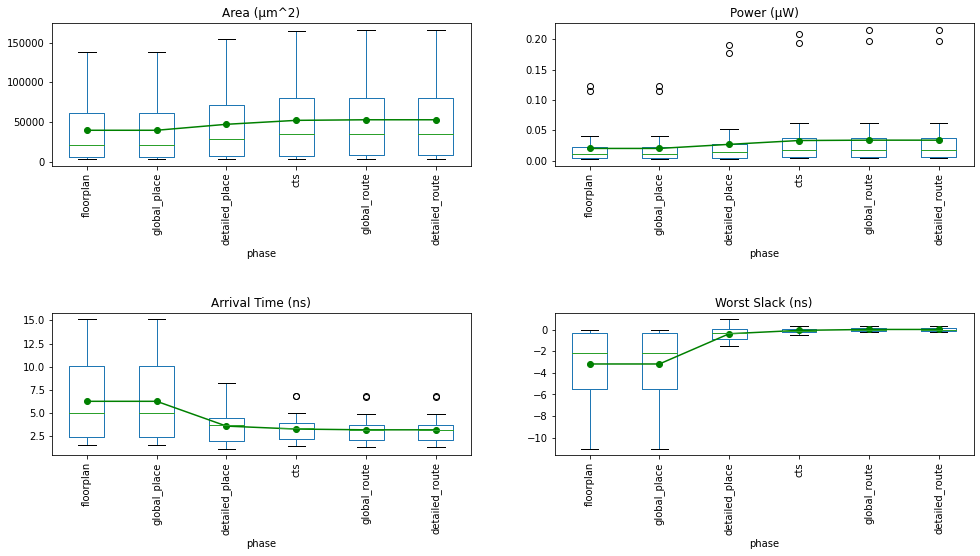

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
fig.tight_layout(pad=10)

columns = ["total_area", "total_power", "worst_arrival_time", "worst_slack"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)", "Worst Slack (ns)"]

for i, metric in enumerate(columns):
    df.boxplot(column=[metric], by="phase", grid=False, ax=axes[i], showfliers=True)
    means = df.groupby("phase")[metric].mean()
    x_positions = list(range(1, len(means) + 1))
    axes[i].plot(list(range(1, len(means) + 1)), means, marker='o', color='green')
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

fig.suptitle('')